# Clustering Assignment

## Libraries

In [1]:
import scipy.io
import pandas as pd
import numpy as np
from PIL import Image
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer

## mat to csv

### Read mat files

In [2]:
geometry = scipy.io.loadmat('centroid_edges.mat')
density = scipy.io.loadmat('points.mat')
image = scipy.io.loadmat('binaryalphadigs.mat')
text = scipy.io.loadmat('20news_w100.mat')

# Exploratory Data Analysis

### Geometry

In [3]:
geometry_df = pd.DataFrame(np.hstack((geometry['data'].reshape((-1, 2)), geometry['classlabels'].reshape((-1, 1)))), 
                           columns=['feature1', 'feature2', 'classlabels'])

In [4]:
geometry_df.head()

,feature1,feature2,classlabels
0,1.660711,-0.081795,2.0
1,0.480771,1.690639,2.0
2,0.432732,1.445216,2.0
3,1.890520,1.702591,2.0
4,0.539714,1.967016,2.0


In [5]:
## Classes
geometry_df['classlabels'].unique()

array([2., 3., 4., 1.])

In [6]:
geometry_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   feature1     400 non-null    float64
 1   feature2     400 non-null    float64
 2   classlabels  400 non-null    float64
dtypes: float64(3)
memory usage: 9.5 KB


In [7]:
geometry_df.dropna()

,feature1,feature2,classlabels
0,1.660711,-0.081795,2.0
1,0.480771,1.690639,2.0
2,0.432732,1.445216,2.0
3,1.890520,1.702591,2.0
4,0.539714,1.967016,2.0
...,...,...,...
395,-4.306227,-3.579678,3.0
396,-4.255281,-4.323690,3.0
397,-4.506189,-3.028091,3.0
398,-3.765702,-4.359100,3.0


In [8]:
geometry_df.describe()

,feature1,feature2,classlabels
count,400.000000,400.000000,400.000000
mean,1.411772,1.669695,2.502500
std,3.956212,4.017857,1.119431
min,-5.571851,-8.100165,1.000000
25%,-2.225842,-2.077505,1.750000
50%,1.343948,1.694358,3.000000
75%,4.095259,4.109823,3.250000
max,12.639818,14.116393,4.000000


<AxesSubplot:xlabel='feature1', ylabel='feature2'>

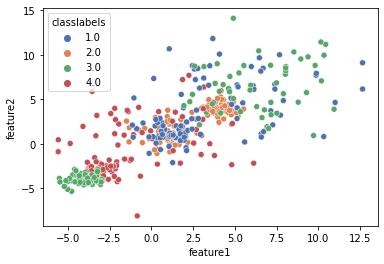

In [9]:
sns.scatterplot(x='feature1', y='feature2', hue='classlabels', data=geometry_df, palette="deep")

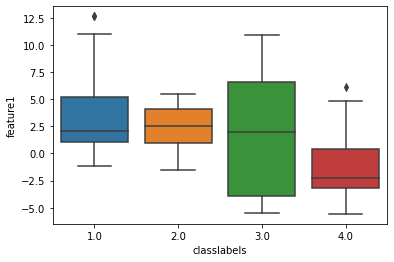

In [10]:
ax = sns.boxplot(x="classlabels", y="feature1", data=geometry_df)

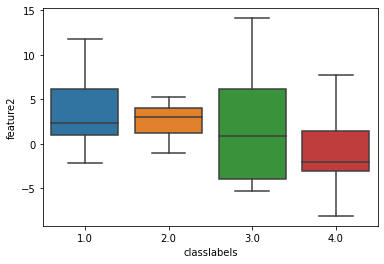

In [11]:
ax = sns.boxplot(x="classlabels", y="feature2", data=geometry_df)

## Discussion

Since the clusters have variable densities the best clustering technique would be
* KMEANS
  * Would be best for roughly circular clusters
* Hierarchical - Ward
  * Ward's method will create clusters that would reduce variance and hence clusters with similar densities would be grouped together

### Density

In [12]:
density_df = pd.DataFrame(np.hstack((density['data'].reshape((-1, 2)), density['classlabels'].reshape((-1, 1)))), 
                           columns=['feature1', 'feature2', 'classlabels'])

In [13]:
density_df.head()

,feature1,feature2,classlabels
0,-1.747274,-0.467309,1.0
1,5.881508,0.020404,1.0
2,-0.711851,0.657246,2.0
3,-0.819102,-0.990340,1.0
4,-0.733042,-0.571062,1.0


We do not have missing values
We do not have outliers

### Classes

In [14]:
## Classes
density_df['classlabels'].unique()

array([1., 2., 3.])

In [15]:
density_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   feature1     1000 non-null   float64
 1   feature2     1000 non-null   float64
 2   classlabels  1000 non-null   float64
dtypes: float64(3)
memory usage: 23.6 KB


In [16]:
density_df.describe()

,feature1,feature2,classlabels
count,1000.000000,1000.000000,1000.000000
mean,-1.592438,-1.778583,1.474000
std,2.803493,2.616823,0.762828
min,-5.793274,-7.260091,1.000000
25%,-3.963591,-3.994465,1.000000
50%,-1.755580,-2.009439,1.000000
75%,-0.160975,-0.263440,2.000000
max,7.203269,6.545940,3.000000


<AxesSubplot:xlabel='feature1', ylabel='feature2'>

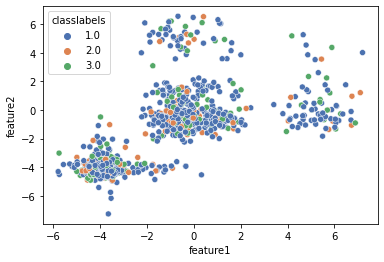

In [17]:
sns.scatterplot(x='feature1', y='feature2', hue='classlabels', data=density_df, palette="deep")

Clusters label do not correspond to the clusters given by the data

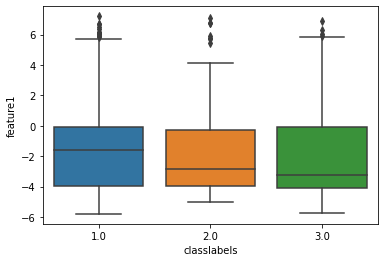

In [18]:
ax = sns.boxplot(x="classlabels", y="feature1", data=density_df)

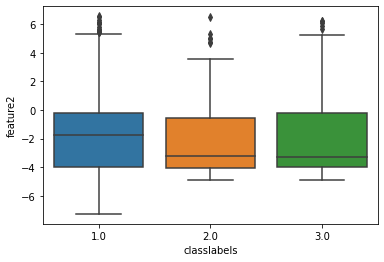

In [19]:
ax = sns.boxplot(x="classlabels", y="feature2", data=density_df)

We have overlapping clusters using feature 1 and feature 2.
Engineering new features using these could be beneficial for clustering

## Feature Engineering

In [20]:
density_df['log+1_f1'] = (density_df['feature1']+1).transform(np.log)
density_df['log+1_f2'] = (density_df['feature2']+1).transform(np.log)
density_df['log_f1'] = (density_df['feature1']-density_df['feature1'].min()+1).transform(np.log)
density_df['log_f2'] = (density_df['feature2']-density_df['feature2'].min()+1).transform(np.log)
density_df['normalized_f1'] = (density_df['feature1'] - density_df['feature1'].min()) / (density_df['feature1'].max() - density_df['feature1'].min())
density_df['normalized_f2'] = (density_df['feature2'] - density_df['feature2'].min()) / (density_df['feature2'].max() - density_df['feature2'].min())
density_df['standardized_f1'] = (density_df['feature1'] - density_df['feature1'].mean()) / density_df['feature1'].std()
density_df['standardized_f2'] = (density_df['feature2'] - density_df['feature2'].mean()) / density_df['feature2'].std()
density_df['round_f1'] = np.array(np.round((density_df['feature1'] * 10)), dtype='int')
density_df['round_f2'] = np.array(np.round((density_df['feature2'] * 10)), dtype='int')

In [21]:
density_df['feature3'] = np.array([np.sqrt(f1**2 + f2**2) for f1, f2 in density_df[['feature1', 'feature2']].to_numpy()], dtype='int')

<AxesSubplot:xlabel='log_f2', ylabel='normalized_f2'>

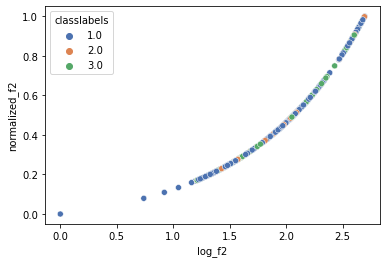

In [22]:
sns.scatterplot(x='log_f2', y='normalized_f2', hue='classlabels', data=density_df, palette="deep")

Engineered features are not used since they did not help in reshaping the clusters

### Text

### Vocabulary

In [23]:
wordlist = [text['wordlist'][0][i][0] for i in range(100)]

In [24]:
wordlist[:10]

['aids',
 'baseball',
 'bible',
 'bmw',
 'cancer',
 'car',
 'card',
 'case',
 'children',
 'christian']

### Length of Vocabulary

In [25]:
print(f"We have {len(wordlist)} words")

We have 100 words


### Number of Documents

In [26]:
text['documents'].toarray().shape

(100, 16242)

In [27]:
num_documents = text['documents'].toarray().shape[1]
print(f"We have {num_documents} documents")

We have 16242 documents


### Number of Classes

In [28]:
categories = [cat[0] for cat in text['groupnames'][0]]
print("We have these categories:")
print('\n'.join(categories))

We have these categories:
comp.*
rec.*
sci.*
talk.*


### Documents

In [29]:
columns=['document', 'category', 'classlabels']
document_df = pd.DataFrame(columns=columns)

In [30]:
ni = 0
documents = text['documents'].toarray().reshape((-1, 100))
labels = text['newsgroups'][0]
for i in range(num_documents):
    many_hot_encoding = documents[i]
    li = labels[i]
    label = categories[li - 1]
    document_tokens = [wordlist[i] for i, present in enumerate(many_hot_encoding) if present]
    document = " ".join(document_tokens)
    document = document if document else None
    row_list = [document, label, li]
    row = dict(zip(columns, row_list))
    document_df = document_df.append(row, ignore_index=True)     

In [31]:
print("Shape: ", document_df.shape)
document_df.head()

Shape:  (16242, 3)


,document,category,classlabels
0,None,comp.*,1
1,win,comp.*,1
2,None,comp.*,1
3,None,comp.*,1
4,None,comp.*,1


In [32]:
document_df = document_df.dropna()
print("Shape: ", document_df.shape)
document_df.sample(10)

Shape:  (8895, 3)


,document,category,classlabels
8099,president rights vitamin,rec.*,2
7595,dos help hockey win,rec.*,2
4138,children fact space video,comp.*,1
4818,food,rec.*,2
16217,aids driver earth email engine fact fans food ...,talk.*,4
271,phone,comp.*,1
5510,bible car christian course data disease disk d...,rec.*,2
2868,ftp hockey,comp.*,1
11397,christian jews league moon power science versi...,talk.*,4
4530,players,comp.*,1


In [33]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [34]:
def normalize(data, num_features=100):
    scaler = StandardScaler()
    scaler.fit(data)
    data = scaler.transform(data)
    pca = PCA(n_components=num_features, random_state=22)
    pca.fit(data)
    x = pca.transform(data)
    return x

# Clustering

In [35]:
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering
from sklearn import metrics

## Geometry Data

In [36]:
geometry_df.head()

,feature1,feature2,classlabels
0,1.660711,-0.081795,2.0
1,0.480771,1.690639,2.0
2,0.432732,1.445216,2.0
3,1.890520,1.702591,2.0
4,0.539714,1.967016,2.0


In [37]:
X = geometry_df[['feature1', 'feature2']].to_numpy()
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)
y = geometry_df['classlabels'].to_numpy()

### True Clusters

<AxesSubplot:xlabel='feature1', ylabel='feature2'>

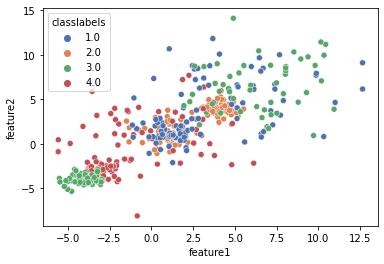

In [38]:
sns.scatterplot(x='feature1', y='feature2', hue='classlabels', data=geometry_df, palette="deep")

#### KMEANS

In [39]:
kmeans = KMeans(n_clusters=4, random_state=0).fit(X)
kmeans_pred_clusters = kmeans.labels_
geometry_df['kmeans_pred_clusters'] = kmeans_pred_clusters.tolist()

<AxesSubplot:xlabel='feature1', ylabel='feature2'>

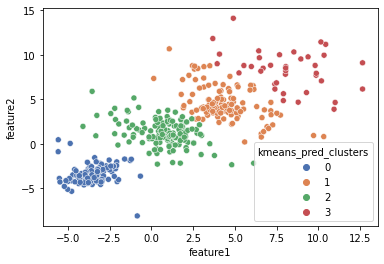

In [40]:
sns.scatterplot(x='feature1', y='feature2', hue='kmeans_pred_clusters', data=geometry_df, palette="deep")

#### DBSCAN

In [41]:
db = DBSCAN(eps=0.3, min_samples=10).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
dbscan_pred_clusters = db.labels_
geometry_df['dbscan_pred_clusters'] = dbscan_pred_clusters.tolist()
# Number of clusters 
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

In [42]:
print(f"Numbger of clusters: {n_clusters_}")

Numbger of clusters: 4


<AxesSubplot:xlabel='feature1', ylabel='feature2'>

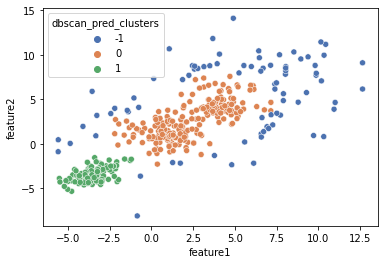

In [43]:
sns.scatterplot(x='feature1', y='feature2', hue='dbscan_pred_clusters', data=geometry_df, palette="deep")

## Discussion

DBSCAN has a disadvantage in data which has clusters has variable densities. Therefore it performs poorly than KMEANS since KMEANS is good at ellipsoidal clusters.

### Hierarchical

#### Single Link

In [44]:
cluster_single = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='single')  
hierarchical_single_pred_clusters = cluster_single.fit_predict(X)
geometry_df['hierarchical_single_pred_clusters'] = hierarchical_single_pred_clusters.tolist()

<AxesSubplot:xlabel='feature1', ylabel='feature2'>

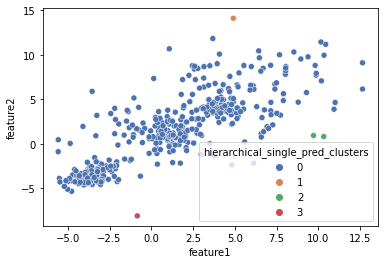

In [45]:
sns.scatterplot(x='feature1', y='feature2', hue='hierarchical_single_pred_clusters', data=geometry_df, palette="deep")

#### Complete Linkage

In [46]:
cluster_complete = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='complete')  
hierarchical_complete_pred_clusters = cluster_complete.fit_predict(X)
geometry_df['hierarchical_complete_pred_clusters'] = hierarchical_complete_pred_clusters.tolist()

<AxesSubplot:xlabel='feature1', ylabel='feature2'>

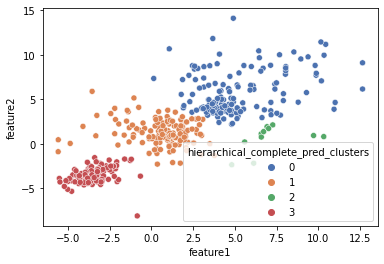

In [47]:
sns.scatterplot(x='feature1', y='feature2', hue='hierarchical_complete_pred_clusters', data=geometry_df, palette="deep")

#### Average Linkage

In [48]:
cluster_avg = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='average')  
hierarchical_avg_pred_clusters = cluster_avg.fit_predict(X)
geometry_df['hierarchical_avg_pred_clusters'] = hierarchical_avg_pred_clusters.tolist()

<AxesSubplot:xlabel='feature1', ylabel='feature2'>

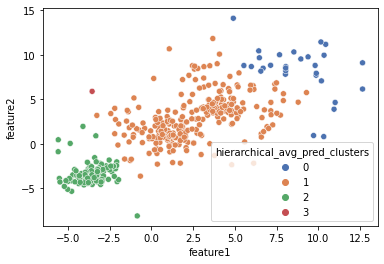

In [49]:
sns.scatterplot(x='feature1', y='feature2', hue='hierarchical_avg_pred_clusters', data=geometry_df, palette="deep")

#### Ward

In [50]:
cluster_ward = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')  
hierarchical_ward_pred_clusters = cluster_ward.fit_predict(X)
geometry_df['hierarchical_ward_pred_clusters'] = hierarchical_ward_pred_clusters.tolist()

<AxesSubplot:xlabel='feature1', ylabel='feature2'>

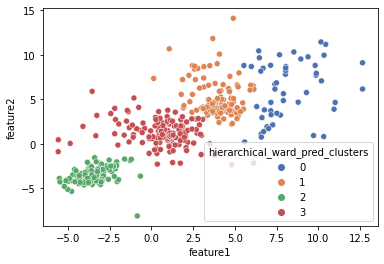

In [51]:
sns.scatterplot(x='feature1', y='feature2', hue='hierarchical_ward_pred_clusters', data=geometry_df, palette="deep")

## Cluster Evaluation

In [52]:
kmeans_score = metrics.rand_score(y, kmeans_pred_clusters)
dbscan_score = metrics.rand_score(y, dbscan_pred_clusters)
hierarchial_single_score = metrics.rand_score(y, hierarchical_single_pred_clusters)
hierarchial_complete_score = metrics.rand_score(y, hierarchical_complete_pred_clusters)
hierarchial_avg_score = metrics.rand_score(y, hierarchical_avg_pred_clusters)
hierarchial_ward_score = metrics.rand_score(y, hierarchical_ward_pred_clusters)
print("KMEANS: ", kmeans_score)
print("DBSCAN: ", dbscan_score)
print("Hierarchical (single): ", hierarchial_single_score)
print("Hierarchical (complete): ", hierarchial_complete_score)
print("Hierarchical (average): ", hierarchial_avg_score)
print("Hierarchical (ward): ", hierarchial_ward_score)

KMEANS:  0.6776691729323309
DBSCAN:  0.6385964912280702
Hierarchical (single):  0.2580952380952381
Hierarchical (complete):  0.6567794486215539
Hierarchical (average):  0.5675438596491228
Hierarchical (ward):  0.6845614035087719


In [53]:
kmeans_score = metrics.adjusted_mutual_info_score(y, kmeans_pred_clusters)
dbscan_score = metrics.adjusted_mutual_info_score(y, dbscan_pred_clusters)
hierarchial_single_score = metrics.adjusted_mutual_info_score(y, hierarchical_single_pred_clusters)
hierarchial_complete_score = metrics.adjusted_mutual_info_score(y, hierarchical_complete_pred_clusters)
hierarchial_avg_score = metrics.adjusted_mutual_info_score(y, hierarchical_avg_pred_clusters)
hierarchial_ward_score = metrics.adjusted_mutual_info_score(y, hierarchical_ward_pred_clusters)
print("KMEANS: ", kmeans_score)
print("DBSCAN: ", dbscan_score)
print("Hierarchical (single): ", hierarchial_single_score)
print("Hierarchical (complete): ", hierarchial_complete_score)
print("Hierarchical (average): ", hierarchial_avg_score)
print("Hierarchical (ward): ", hierarchial_ward_score)

KMEANS:  0.2780918393323704
DBSCAN:  0.2739027956456567
Hierarchical (single):  -0.0012899581055579761
Hierarchical (complete):  0.2545928160749181
Hierarchical (average):  0.2617256700448186
Hierarchical (ward):  0.2931276045421701


In [54]:
geometry_df.head()

,feature1,feature2,classlabels,kmeans_pred_clusters,dbscan_pred_clusters,hierarchical_single_pred_clusters,hierarchical_complete_pred_clusters,hierarchical_avg_pred_clusters,hierarchical_ward_pred_clusters
0,1.660711,-0.081795,2.0,2,0,0,1,1,3
1,0.480771,1.690639,2.0,2,0,0,1,1,3
2,0.432732,1.445216,2.0,2,0,0,1,1,3
3,1.890520,1.702591,2.0,2,0,0,1,1,3
4,0.539714,1.967016,2.0,2,0,0,1,1,3


## Density Data

In [55]:
density_df.head()

,feature1,feature2,classlabels,log+1_f1,log+1_f2,log_f1,log_f2,normalized_f1,normalized_f2,standardized_f1,standardized_f2,round_f1,round_f2,feature3
0,-1.747274,-0.467309,1.0,NaN,-0.629814,1.618596,2.053198,0.311314,0.492016,-0.055230,0.501094,-17,-5,1
1,5.881508,0.020404,1.0,1.928838,0.020199,2.539614,2.113903,0.898299,0.527342,2.665940,0.687470,59,0,5
2,-0.711851,0.657246,2.0,-1.244278,0.505157,1.805239,2.187997,0.390983,0.573469,0.314103,0.930835,-7,7,0
3,-0.819102,-0.990340,1.0,-1.709819,-4.639757,1.787446,1.983722,0.382730,0.454131,0.275847,0.301222,-8,-10,1
4,-0.733042,-0.571062,1.0,-1.320664,-0.846443,1.801748,2.039795,0.389352,0.484501,0.306545,0.461446,-7,-6,0


In [56]:
X = density_df[['feature1', 'feature2']].to_numpy()
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)
y = density_df['classlabels'].to_numpy()

### True Clusters

<AxesSubplot:xlabel='feature1', ylabel='feature2'>

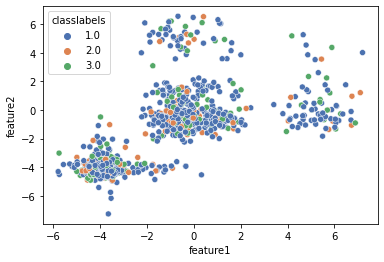

In [57]:
sns.scatterplot(x='feature1', y='feature2', hue='classlabels', data=density_df, palette="deep")

#### KMEANS

In [58]:
kmeans = KMeans(n_clusters=3, random_state=0).fit(X)
kmeans_pred_clusters = kmeans.labels_
density_df['kmeans_pred_clusters'] = kmeans_pred_clusters.tolist()

<AxesSubplot:xlabel='feature1', ylabel='feature2'>

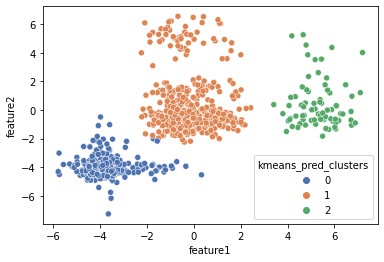

In [59]:
sns.scatterplot(x='feature1', y='feature2', hue='kmeans_pred_clusters', data=density_df, palette="deep")

#### DBSCAN

In [60]:
db = DBSCAN(eps=0.3, min_samples=10).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
dbscan_pred_clusters = db.labels_
density_df['dbscan_pred_clusters'] = dbscan_pred_clusters.tolist()
# Number of clusters 
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

In [61]:
print(f"Number of clusters: {n_clusters_}")

Number of clusters: 4


<AxesSubplot:xlabel='feature1', ylabel='feature2'>

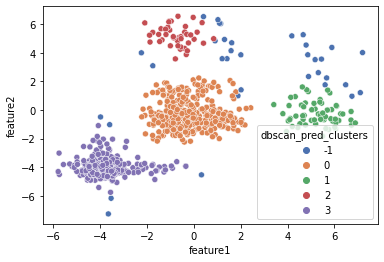

In [62]:
sns.scatterplot(x='feature1', y='feature2', hue='dbscan_pred_clusters', data=density_df, palette="deep")

Blue dots above are noise data points according to DBSCAN algorithm

### Hierarchical

#### Single Link

In [63]:
cluster_single = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='single')  
hierarchical_single_pred_clusters = cluster_single.fit_predict(X)
density_df['hierarchical_single_pred_clusters'] = hierarchical_single_pred_clusters.tolist()

<AxesSubplot:xlabel='feature1', ylabel='feature2'>

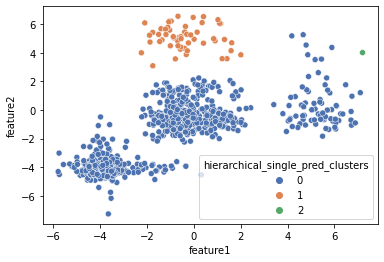

In [64]:
sns.scatterplot(x='feature1', y='feature2', hue='hierarchical_single_pred_clusters', data=density_df, palette="deep")

#### Complete Linkage

In [65]:
cluster_complete = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='complete')  
hierarchical_complete_pred_clusters = cluster_complete.fit_predict(X)
density_df['hierarchical_complete_pred_clusters'] = hierarchical_complete_pred_clusters.tolist()

<AxesSubplot:xlabel='feature1', ylabel='feature2'>

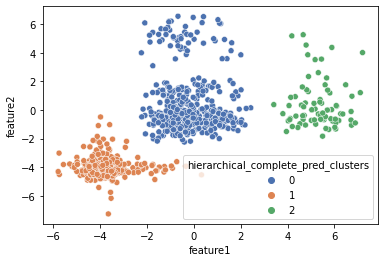

In [66]:
sns.scatterplot(x='feature1', y='feature2', hue='hierarchical_complete_pred_clusters', data=density_df, palette="deep")

#### Average Linkage

In [67]:
cluster_avg = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='average')  
hierarchical_avg_pred_clusters = cluster_avg.fit_predict(X)
density_df['hierarchical_avg_pred_clusters'] = hierarchical_avg_pred_clusters.tolist()

<AxesSubplot:xlabel='feature1', ylabel='feature2'>

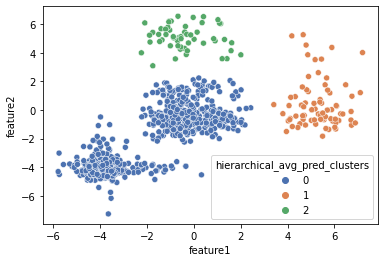

In [68]:
sns.scatterplot(x='feature1', y='feature2', hue='hierarchical_avg_pred_clusters', data=density_df, palette="deep")

#### Ward

In [69]:
cluster_ward = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')  
hierarchical_ward_pred_clusters = cluster_ward.fit_predict(X)
density_df['hierarchical_ward_pred_clusters'] = hierarchical_ward_pred_clusters.tolist()

<AxesSubplot:xlabel='feature1', ylabel='feature2'>

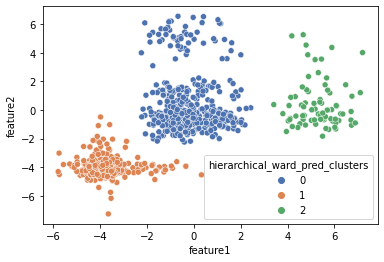

In [70]:
sns.scatterplot(x='feature1', y='feature2', hue='hierarchical_ward_pred_clusters', data=density_df, palette="deep")

## Cluster Evaluation

In [71]:
kmeans_score = metrics.rand_score(y, kmeans_pred_clusters)
dbscan_score = metrics.rand_score(y, dbscan_pred_clusters)
hierarchial_single_score = metrics.rand_score(y, hierarchical_single_pred_clusters)
hierarchial_complete_score = metrics.rand_score(y, hierarchical_complete_pred_clusters)
hierarchial_avg_score = metrics.rand_score(y, hierarchical_avg_pred_clusters)
hierarchial_ward_score = metrics.rand_score(y, hierarchical_ward_pred_clusters)
print("KMEANS: ", kmeans_score)
print("DBSCAN: ", dbscan_score)
print("Hierarchical (single): ", hierarchial_single_score)
print("Hierarchical (complete): ", hierarchial_complete_score)
print("Hierarchical (average): ", hierarchial_avg_score)
print("Hierarchical (ward): ", hierarchial_ward_score)

KMEANS:  0.49417617617617615
DBSCAN:  0.49173173173173174
Hierarchical (single):  0.5205225225225225
Hierarchical (complete):  0.4942522522522523
Hierarchical (average):  0.5126526526526527
Hierarchical (ward):  0.4942522522522523


In [72]:
kmeans_score = metrics.adjusted_mutual_info_score(y, kmeans_pred_clusters)
dbscan_score = metrics.adjusted_mutual_info_score(y, dbscan_pred_clusters)
hierarchial_single_score = metrics.adjusted_mutual_info_score(y, hierarchical_single_pred_clusters)
hierarchial_complete_score = metrics.adjusted_mutual_info_score(y, hierarchical_complete_pred_clusters)
hierarchial_avg_score = metrics.adjusted_mutual_info_score(y, hierarchical_avg_pred_clusters)
hierarchial_ward_score = metrics.adjusted_mutual_info_score(y, hierarchical_ward_pred_clusters)
print("KMEANS: ", kmeans_score)
print("DBSCAN: ", dbscan_score)
print("Hierarchical (single): ", hierarchial_single_score)
print("Hierarchical (complete): ", hierarchial_complete_score)
print("Hierarchical (average): ", hierarchial_avg_score)
print("Hierarchical (ward): ", hierarchial_ward_score)

KMEANS:  -0.00022895256857052818
DBSCAN:  -0.00042432867072653775
Hierarchical (single):  -0.0020101477078077615
Hierarchical (complete):  -0.0003788215049082881
Hierarchical (average):  -0.0017337302333878452
Hierarchical (ward):  -0.0003788215049082881


In [73]:
density_df.head()

,feature1,feature2,classlabels,log+1_f1,log+1_f2,log_f1,log_f2,normalized_f1,normalized_f2,standardized_f1,standardized_f2,round_f1,round_f2,feature3,kmeans_pred_clusters,dbscan_pred_clusters,hierarchical_single_pred_clusters,hierarchical_complete_pred_clusters,hierarchical_avg_pred_clusters,hierarchical_ward_pred_clusters
0,-1.747274,-0.467309,1.0,NaN,-0.629814,1.618596,2.053198,0.311314,0.492016,-0.055230,0.501094,-17,-5,1,1,0,0,0,0,0
1,5.881508,0.020404,1.0,1.928838,0.020199,2.539614,2.113903,0.898299,0.527342,2.665940,0.687470,59,0,5,2,1,0,2,1,2
2,-0.711851,0.657246,2.0,-1.244278,0.505157,1.805239,2.187997,0.390983,0.573469,0.314103,0.930835,-7,7,0,1,0,0,0,0,0
3,-0.819102,-0.990340,1.0,-1.709819,-4.639757,1.787446,1.983722,0.382730,0.454131,0.275847,0.301222,-8,-10,1,1,0,0,0,0,0
4,-0.733042,-0.571062,1.0,-1.320664,-0.846443,1.801748,2.039795,0.389352,0.484501,0.306545,0.461446,-7,-6,0,1,0,0,0,0,0


## Text Data

In [74]:
corpus = document_df['document'].tolist()
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(corpus)
X = X.toarray()
X = normalize(X)

In [75]:
y = document_df['classlabels'].to_numpy()

#### KMEANS

In [76]:
kmeans = KMeans(n_clusters=4, random_state=0).fit(X)
kmeans_pred_clusters = kmeans.labels_

#### DBSCAN

In [77]:
db = DBSCAN(eps=0.3, min_samples=10).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
dbscan_pred_clusters = db.labels_

# Number of clusters 
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

In [78]:
print(f"Numbger of clusters: {n_clusters_}")

Numbger of clusters: 4


#### Hierarchical

In [79]:
cluster_single = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='single')  
hierarchical_single_pred_clusters = cluster_single.fit_predict(X)

cluster_complete = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='complete')  
hierarchical_complete_pred_clusters = cluster_complete.fit_predict(X)

cluster_avg = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='average')  
hierarchical_avg_pred_clusters = cluster_avg.fit_predict(X)

cluster_ward = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')  
hierarchical_ward_pred_clusters = cluster_ward.fit_predict(X)

## Cluster Evaluation

In [80]:
kmeans_score = metrics.rand_score(y, kmeans_pred_clusters)
dbscan_score = metrics.rand_score(y, dbscan_pred_clusters)
hierarchial_single_score = metrics.rand_score(y, hierarchical_single_pred_clusters)
hierarchial_complete_score = metrics.rand_score(y, hierarchical_complete_pred_clusters)
hierarchial_avg_score = metrics.rand_score(y, hierarchical_avg_pred_clusters)
hierarchial_ward_score = metrics.rand_score(y, hierarchical_ward_pred_clusters)
print("KMEANS: ", kmeans_score)
print("DBSCAN: ", dbscan_score)
print("Hierarchical (single): ", hierarchial_single_score)
print("Hierarchical (complete): ", hierarchial_complete_score)
print("Hierarchical (average): ", hierarchial_avg_score)
print("Hierarchical (ward): ", hierarchial_ward_score)

KMEANS:  0.5377032068280806
DBSCAN:  0.47271049332131493
Hierarchical (single):  0.2881985101399747
Hierarchical (complete):  0.31011178690296926
Hierarchical (average):  0.31481463082842037
Hierarchical (ward):  0.47782573923872357


In [81]:
kmeans_score = metrics.adjusted_mutual_info_score(y, kmeans_pred_clusters)
dbscan_score = metrics.adjusted_mutual_info_score(y, dbscan_pred_clusters)
hierarchial_single_score = metrics.adjusted_mutual_info_score(y, hierarchical_single_pred_clusters)
hierarchial_complete_score = metrics.adjusted_mutual_info_score(y, hierarchical_complete_pred_clusters)
hierarchial_avg_score = metrics.adjusted_mutual_info_score(y, hierarchical_avg_pred_clusters)
hierarchial_ward_score = metrics.adjusted_mutual_info_score(y, hierarchical_ward_pred_clusters)
print("KMEANS: ", kmeans_score)
print("DBSCAN: ", dbscan_score)
print("Hierarchical (single): ", hierarchial_single_score)
print("Hierarchical (complete): ", hierarchial_complete_score)
print("Hierarchical (average): ", hierarchial_avg_score)
print("Hierarchical (ward): ", hierarchial_ward_score)

KMEANS:  0.003044366815692988
DBSCAN:  0.001084139347219649
Hierarchical (single):  3.980842433191433e-05
Hierarchical (complete):  -0.00036570548523822175
Hierarchical (average):  -0.00010110369020663461
Hierarchical (ward):  0.0015177745811602243


### Assuming Count Vectorized Sparse Matrix 

In [82]:
X = text['documents'].toarray().reshape((-1, 100))
y = text['newsgroups'][0]

#### KMEANS

In [83]:
kmeans = KMeans(n_clusters=4, random_state=0).fit(X)
kmeans_pred_clusters = kmeans.labels_

#### DBSCAN

In [84]:
db = DBSCAN(eps=0.3, min_samples=10).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
dbscan_pred_clusters = db.labels_

# Number of clusters 
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

In [85]:
print(f"Numbger of clusters: {n_clusters_}")

Numbger of clusters: 4


#### Hierarchical

In [86]:
cluster_single = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='single')  
hierarchical_single_pred_clusters = cluster_single.fit_predict(X)

cluster_complete = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='complete')  
hierarchical_complete_pred_clusters = cluster_complete.fit_predict(X)

cluster_avg = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='average')  
hierarchical_avg_pred_clusters = cluster_avg.fit_predict(X)

cluster_ward = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')  
hierarchical_ward_pred_clusters = cluster_ward.fit_predict(X)

## Cluster Evaluation

In [87]:
kmeans_score = metrics.rand_score(y, kmeans_pred_clusters)
dbscan_score = metrics.rand_score(y, dbscan_pred_clusters)
hierarchial_single_score = metrics.rand_score(y, hierarchical_single_pred_clusters)
hierarchial_complete_score = metrics.rand_score(y, hierarchical_complete_pred_clusters)
hierarchial_avg_score = metrics.rand_score(y, hierarchical_avg_pred_clusters)
hierarchial_ward_score = metrics.rand_score(y, hierarchical_ward_pred_clusters)
print("KMEANS: ", kmeans_score)
print("DBSCAN: ", dbscan_score)
print("Hierarchical (single): ", hierarchial_single_score)
print("Hierarchical (complete): ", hierarchial_complete_score)
print("Hierarchical (average): ", hierarchial_avg_score)
print("Hierarchical (ward): ", hierarchial_ward_score)

KMEANS:  0.44213801199290387
DBSCAN:  0.5599969129559341
Hierarchical (single):  0.2672428405897407
Hierarchical (complete):  0.27180099201656105
Hierarchical (average):  0.26885152142194846
Hierarchical (ward):  0.5433599244770546


In [88]:
kmeans_score = metrics.adjusted_mutual_info_score(y, kmeans_pred_clusters)
dbscan_score = metrics.adjusted_mutual_info_score(y, dbscan_pred_clusters)
hierarchial_single_score = metrics.adjusted_mutual_info_score(y, hierarchical_single_pred_clusters)
hierarchial_complete_score = metrics.adjusted_mutual_info_score(y, hierarchical_complete_pred_clusters)
hierarchial_avg_score = metrics.adjusted_mutual_info_score(y, hierarchical_avg_pred_clusters)
hierarchial_ward_score = metrics.adjusted_mutual_info_score(y, hierarchical_ward_pred_clusters)
print("KMEANS: ", kmeans_score)
print("DBSCAN: ", dbscan_score)
print("Hierarchical (single): ", hierarchial_single_score)
print("Hierarchical (complete): ", hierarchial_complete_score)
print("Hierarchical (average): ", hierarchial_avg_score)
print("Hierarchical (ward): ", hierarchial_ward_score)

KMEANS:  0.009597674552946946
DBSCAN:  0.008104774964439848
Hierarchical (single):  -3.1384499473371174e-05
Hierarchical (complete):  0.0005538394633639138
Hierarchical (average):  0.00045108992626850244
Hierarchical (ward):  0.011158968604704285


## Summary

### Geometry Data

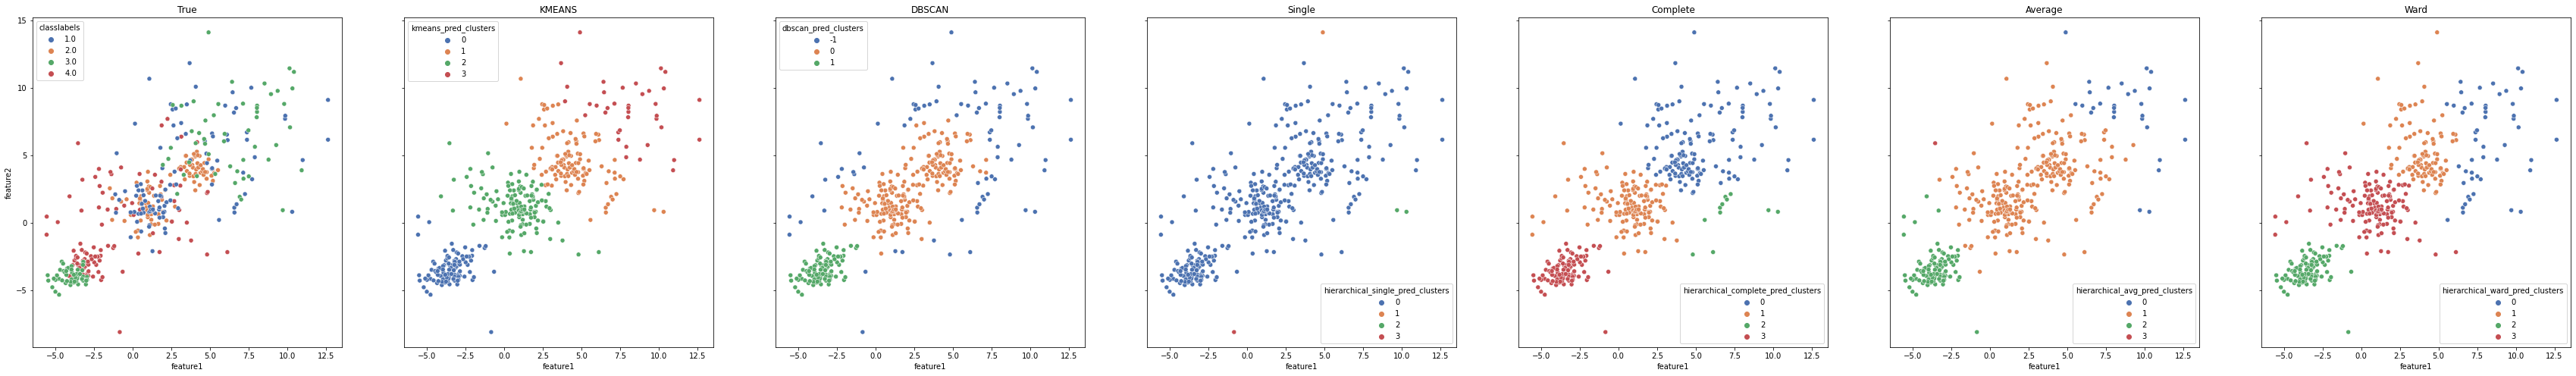

In [100]:
fig, axes = plt.subplots(1, 7, sharey=True, figsize=(60,8))
sns.scatterplot(x='feature1', y='feature2', hue='classlabels', data=geometry_df, palette="deep", ax=axes[0]).set_title("True")
sns.scatterplot(x='feature1', y='feature2', hue='kmeans_pred_clusters', data=geometry_df, palette="deep", ax=axes[1]).set_title("KMEANS")
sns.scatterplot(x='feature1', y='feature2', hue='dbscan_pred_clusters', data=geometry_df, palette="deep", ax=axes[2]).set_title("DBSCAN")
sns.scatterplot(x='feature1', y='feature2', hue='hierarchical_single_pred_clusters', data=geometry_df, palette="deep", ax=axes[3]).set_title("Single")
sns.scatterplot(x='feature1', y='feature2', hue='hierarchical_complete_pred_clusters', data=geometry_df, palette="deep", ax=axes[4]).set_title("Complete")
sns.scatterplot(x='feature1', y='feature2', hue='hierarchical_avg_pred_clusters', data=geometry_df, palette="deep", ax=axes[5]).set_title("Average")
sns.scatterplot(x='feature1', y='feature2', hue='hierarchical_ward_pred_clusters', data=geometry_df, palette="deep", ax=axes[6]).set_title("Ward")
plt.show()

### Density Data

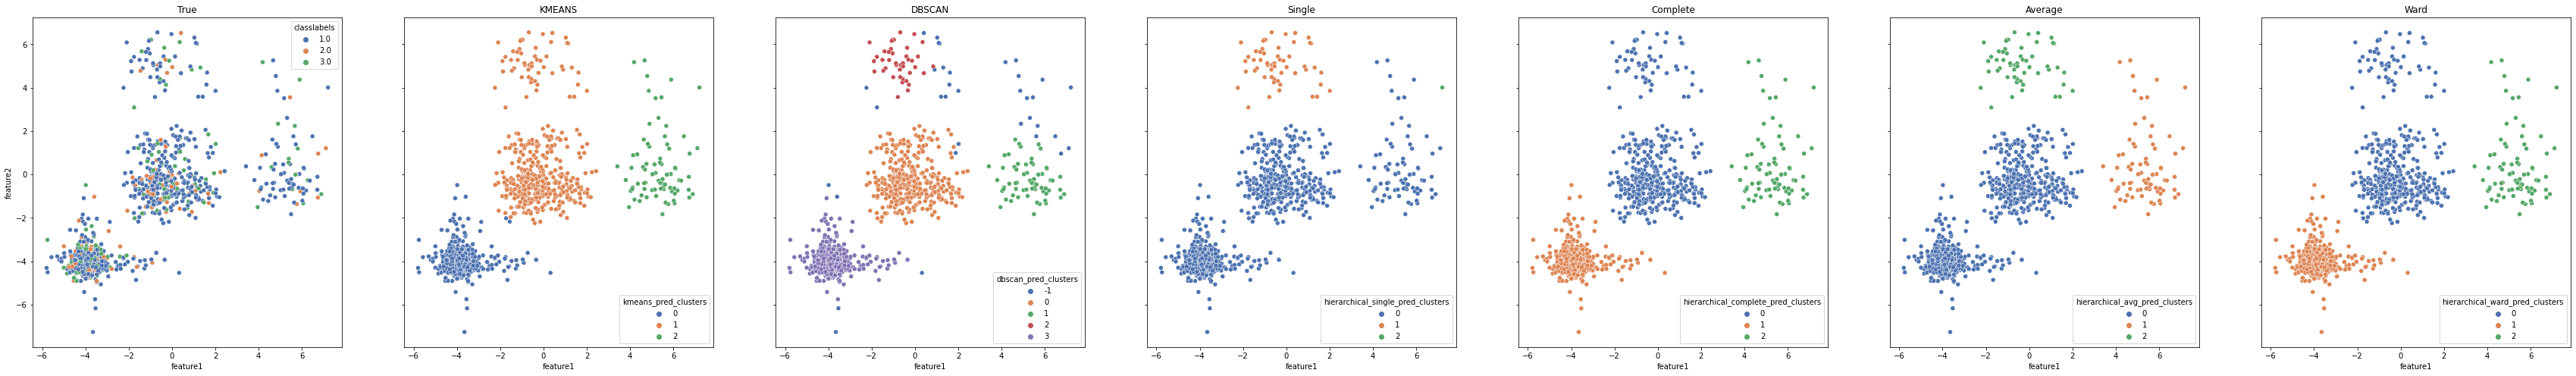

In [101]:
fig, axes = plt.subplots(1, 7, sharey=True, figsize=(60,8))
sns.scatterplot(x='feature1', y='feature2', hue='classlabels', data=density_df, palette="deep", ax=axes[0]).set_title("True")
sns.scatterplot(x='feature1', y='feature2', hue='kmeans_pred_clusters', data=density_df, palette="deep", ax=axes[1]).set_title("KMEANS")
sns.scatterplot(x='feature1', y='feature2', hue='dbscan_pred_clusters', data=density_df, palette="deep", ax=axes[2]).set_title("DBSCAN")
sns.scatterplot(x='feature1', y='feature2', hue='hierarchical_single_pred_clusters', data=density_df, palette="deep", ax=axes[3]).set_title("Single")
sns.scatterplot(x='feature1', y='feature2', hue='hierarchical_complete_pred_clusters', data=density_df, palette="deep", ax=axes[4]).set_title("Complete")
sns.scatterplot(x='feature1', y='feature2', hue='hierarchical_avg_pred_clusters', data=density_df, palette="deep", ax=axes[5]).set_title("Average")
sns.scatterplot(x='feature1', y='feature2', hue='hierarchical_ward_pred_clusters', data=density_df, palette="deep", ax=axes[6]).set_title("Ward")
plt.show()